In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download amanneo/diabetic-retinopathy-resized-arranged

 99% 1.20G/1.21G [00:11<00:00, 121MB/s]
100% 1.21G/1.21G [00:11<00:00, 117MB/s]


In [6]:
! unzip diabetic-retinopathy-resized-arranged.zip

Streaming output truncated to the last 5000 lines.
  inflating: 2/23798_right.jpeg      
  inflating: 2/23817_left.jpeg       
  inflating: 2/23817_right.jpeg      
  inflating: 2/23821_left.jpeg       
  inflating: 2/23821_right.jpeg      
  inflating: 2/23852_left.jpeg       
  inflating: 2/23854_left.jpeg       
  inflating: 2/23905_left.jpeg       
  inflating: 2/23905_right.jpeg      
  inflating: 2/23906_left.jpeg       
  inflating: 2/23923_left.jpeg       
  inflating: 2/23923_right.jpeg      
  inflating: 2/23946_left.jpeg       
  inflating: 2/23946_right.jpeg      
  inflating: 2/23961_left.jpeg       
  inflating: 2/23961_right.jpeg      
  inflating: 2/23967_left.jpeg       
  inflating: 2/23967_right.jpeg      
  inflating: 2/239_left.jpeg         
  inflating: 2/239_right.jpeg        
  inflating: 2/24064_left.jpeg       
  inflating: 2/24064_right.jpeg      
  inflating: 2/24074_left.jpeg       
  inflating: 2/24074_right.jpeg      
  inflating: 2/24075_left.jpeg       

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops, local_binary_pattern
# import os
import os.path
from pathlib import Path

In [9]:
def show_image(img, cmap='gray'):
    fig = plt.figure(figsize=(20,20))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

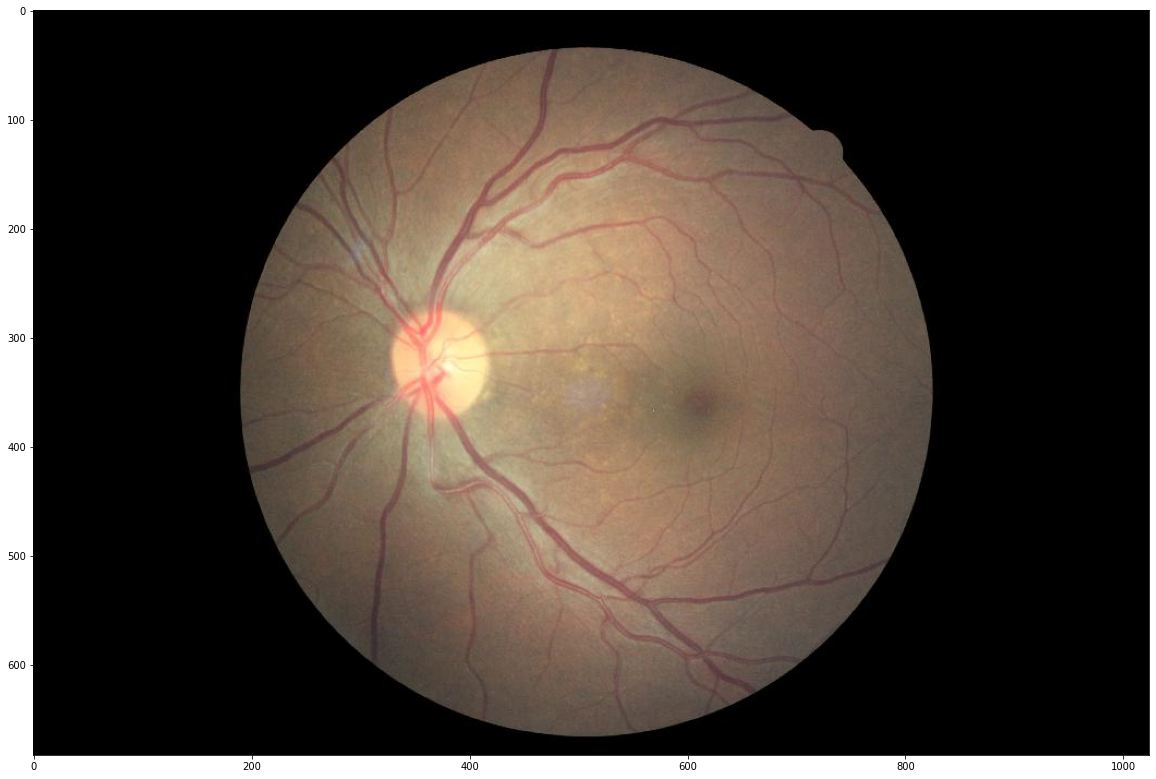

In [10]:
# Example_IMG = DR_Path_Series[23421]
test_img = cv.imread('./0/10003_left.jpeg')
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
show_image(test_img)

In [11]:
width, height, dimension = test_img.shape
print(f'Width RGB = {width}')
print(f'Height RGB = {height}')
print(f'Dimension RGB = {dimension}')

Width RGB = 683
Height RGB = 1024
Dimension RGB = 3


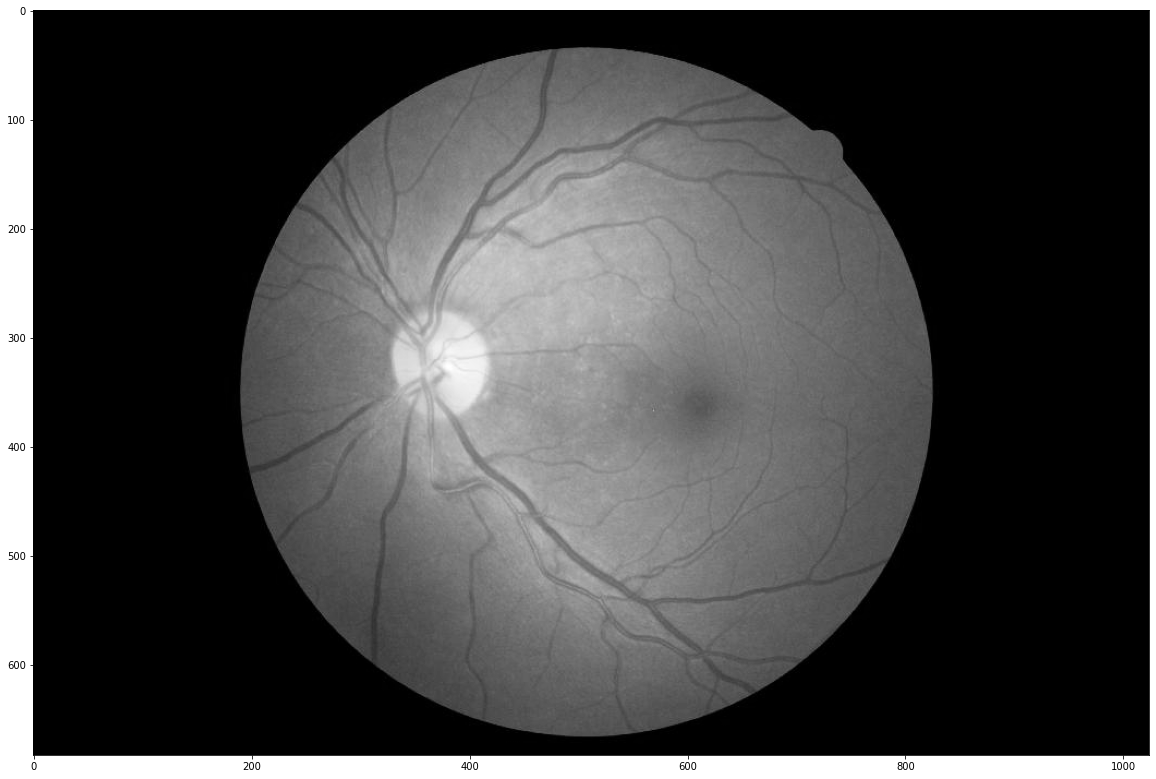

In [12]:
test_img_gray = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)
show_image(test_img_gray)

In [13]:
width, height = test_img_gray.shape
print(f'Width Grayscale = {width}')
print(f'Height Grayscale = {height}')
print(f'Image Shape Grayscale {test_img_gray.shape}')

Width Grayscale = 683
Height Grayscale = 1024
Image Shape Grayscale (683, 1024)


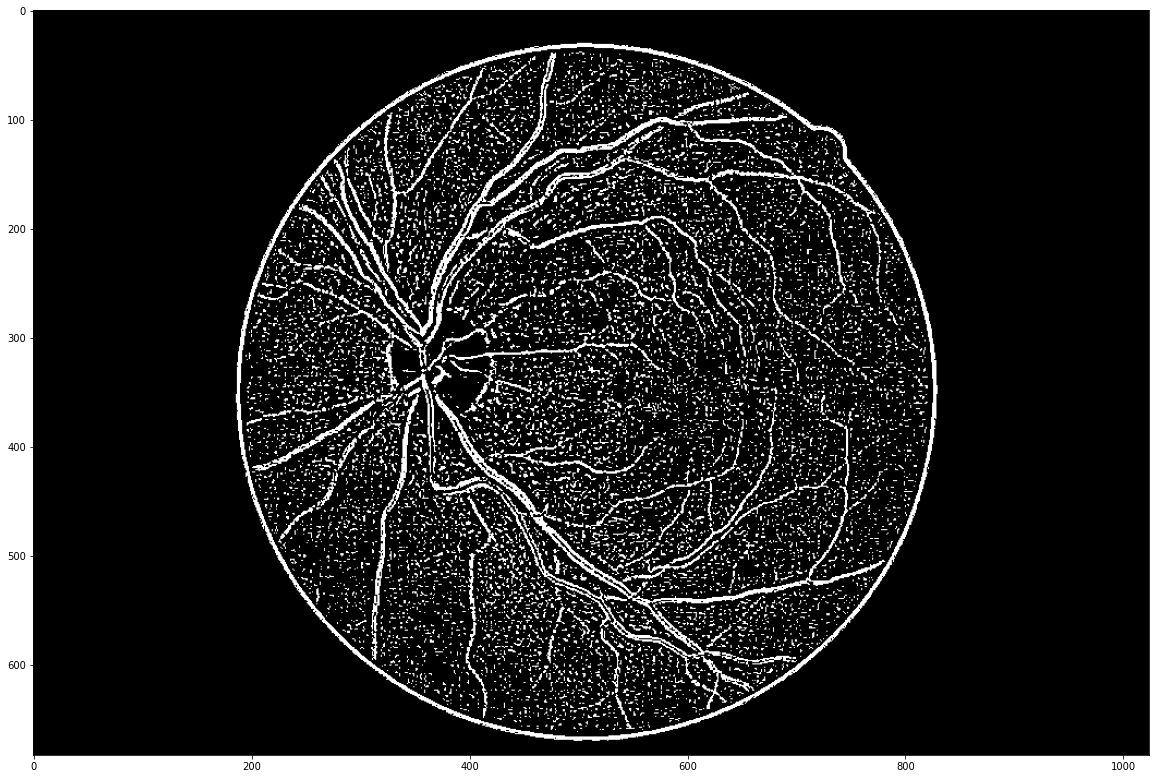

In [14]:
test_img_thresh = cv.adaptiveThreshold(test_img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
show_image(test_img_thresh)

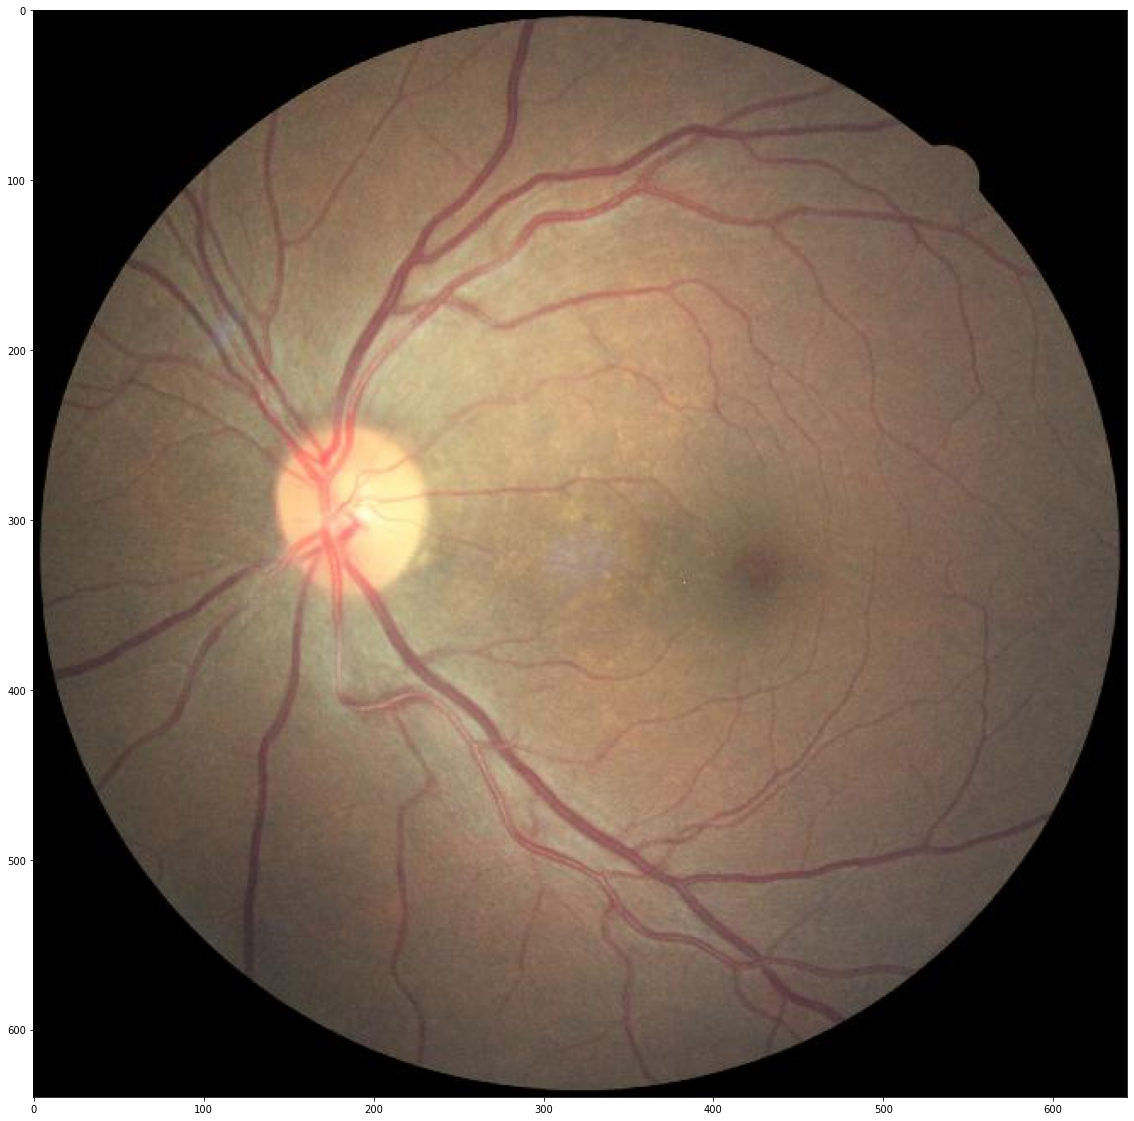

In [15]:
cnts = cv.findContours(test_img_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv.contourArea, reverse=True)
for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    test_img_ROI = test_img[y:y+h, x:x+w]
    break
show_image(test_img_ROI)

In [16]:
width, height, dimension = test_img_ROI.shape
print(f'Width = {width}')
print(f'Height = {height}')
print(f'Dimension = {dimension}')

Width = 640
Height = 644
Dimension = 3


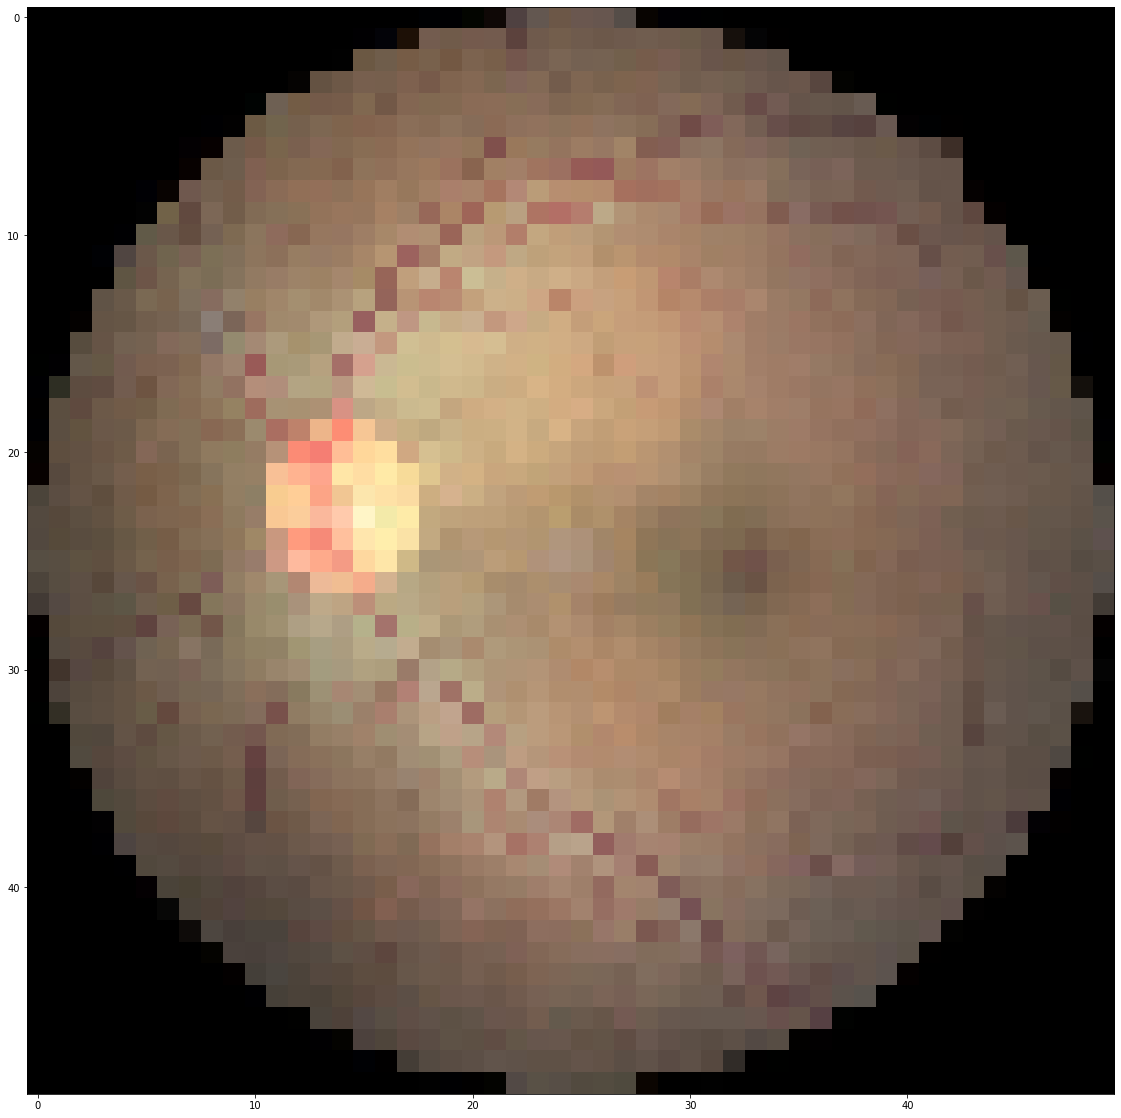

In [17]:
test_img_ROI_resize = cv.resize(test_img_ROI, (int(50), int (50)))
show_image(test_img_ROI_resize)

In [18]:
width, height, dimension = test_img_ROI_resize.shape
print(f'Width = {width}')
print(f'Height = {height}')
print(f'Dimension = {dimension}')

Width = 50
Height = 50
Dimension = 3


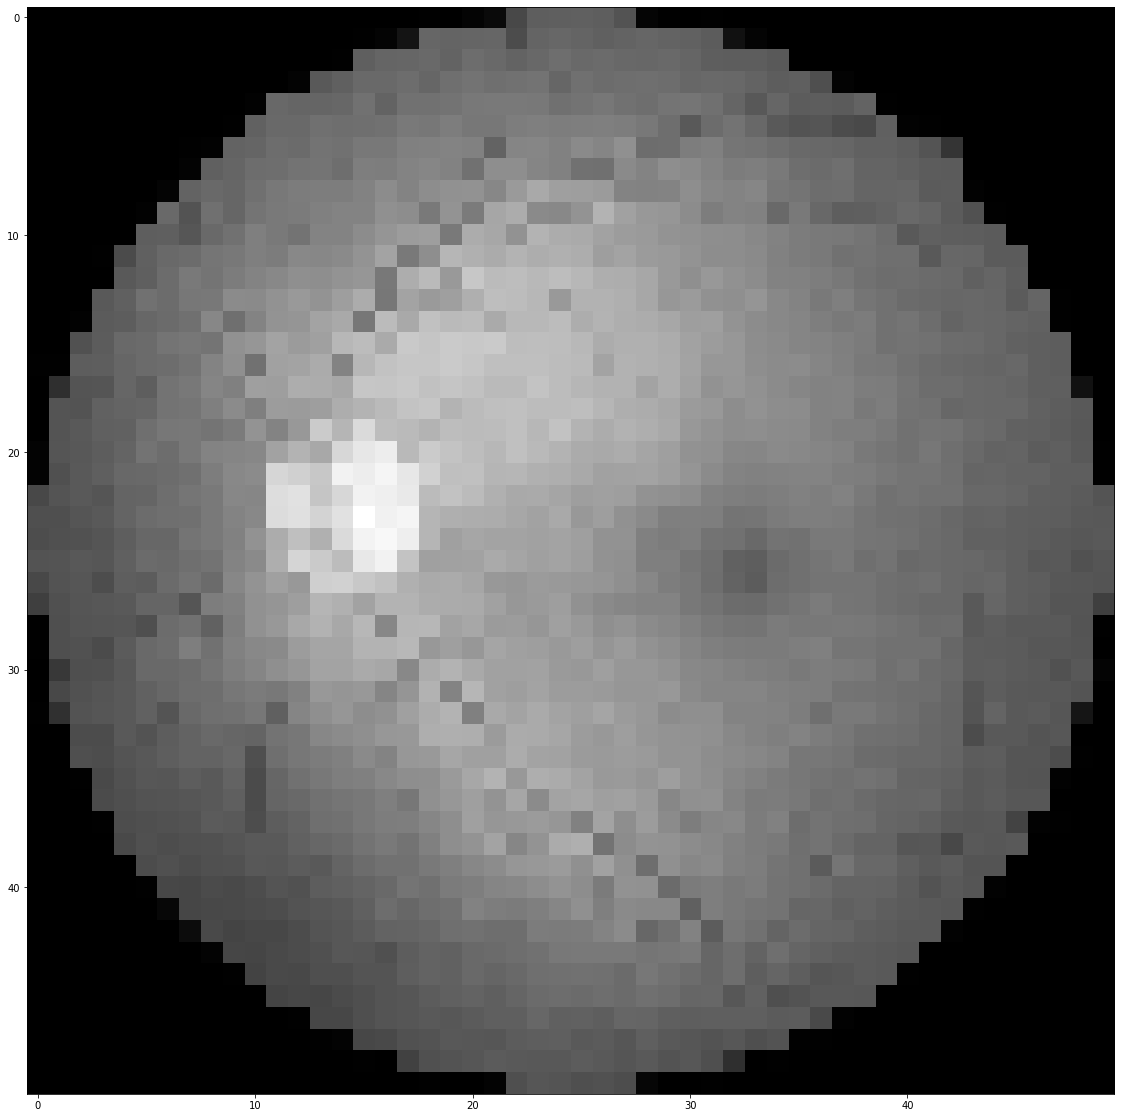

In [19]:
test_img_ROI_resize_gray = cv.cvtColor(test_img_ROI_resize, cv.COLOR_RGB2GRAY)
show_image(test_img_ROI_resize_gray)

In [ ]:
# def glcm_feature(matrix_coocurrence, featureName):
#     feature = graycoprops(matrix_coocurrence, featureName)
#     result = np.average(feature)
#     return result
# distance = 10
# teta = 90

# contrast_test = []
# homogeneity_test = []
# energy_test = []
# correlation_test = []


# glcm = graycomatrix(test_img_ROI_resize_gray, [distance], [teta], levels=256, symmetric=True, normed=True)
# contrast_test.append(glcm_feature(glcm, 'contrast'))
# homogeneity_test.append(glcm_feature(glcm, 'homogeneity'))
# energy_test.append(glcm_feature(glcm, 'energy'))
# correlation_test.append(glcm_feature(glcm, 'correlation'))

# print(f'Homogenity : {homogeneity_test[0]}')
# print(f'Correlation : {correlation_test[0]}')
# print(f'Energy : {energy_test[0]}')
# print(f'Contrast : {contrast_test[0]}')

In [20]:
# def glcm_feature(matrix_coocurrence, featureName):
#     feature = greycoprops(matrix_coocurrence, featureName)
#     result = np.average(feature)
#     return result

class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return hist

# contrast_test = []
# homogeneity_test = []
# energy_test = []
# correlation_test = []

desc = LocalBinaryPatterns(24, 8)

img = desc.describe(test_img_ROI_resize_gray)

# contrast_test.append(glcm_feature(glcm, 'contrast'))
# homogeneity_test.append(glcm_feature(glcm, 'homogeneity'))
# energy_test.append(glcm_feature(glcm, 'energy'))
# correlation_test.append(glcm_feature(glcm, 'correlation'))

print(img)

# print(f'Homogenity : {homogeneity_test[0]}')
# print(f'Correlation : {correlation_test[0]}')
# print(f'Energy : {energy_test[0]}')
# print(f'Contrast : {contrast_test[0]}')

# Cari2 HOG (temennya LBP n GLCM)

[0.0172 0.006  0.0072 0.0128 0.0144 0.0128 0.0172 0.032  0.0536 0.09
 0.1504 0.1412 0.0552 0.0256 0.0136 0.01   0.0056 0.0064 0.0028 0.0016
 0.002  0.0012 0.0008 0.0008 0.2092 0.1104]


In [21]:
def preprocessingImage(image):
    test_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    test_img_gray = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)
    test_img_thresh = cv.adaptiveThreshold(test_img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
    cnts = cv.findContours(test_img_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=cv.contourArea, reverse=True)
    for c in cnts:
        x,y,w,h = cv.boundingRect(c)
        test_img_ROI = test_img[y:y+h, x:x+w]
        break
    test_img_ROI_resize = cv.resize(test_img_ROI, (width, height))
    test_img_ROI_resize_gray = cv.cvtColor(test_img_ROI_resize, cv.COLOR_RGB2GRAY)
    
    return test_img_ROI_resize_gray

In [22]:
Main_noDR = Path("./0")
noDR_Path = list(Main_noDR.glob(r"*.jpeg"))
noDR_Path_Series = pd.Series(noDR_Path,name="JPEG").astype(str)
print(noDR_Path_Series.head(-1))

0        0/38753_right.jpeg
1          0/8558_left.jpeg
2         0/3740_right.jpeg
3         0/12023_left.jpeg
4        0/43367_right.jpeg
                ...        
25804     0/5720_right.jpeg
25805     0/20379_left.jpeg
25806     0/24898_left.jpeg
25807     0/4914_right.jpeg
25808     0/12687_left.jpeg
Name: JPEG, Length: 25809, dtype: object


In [23]:
Main_mild = Path("./1")
mild_Path = list(Main_mild.glob(r"*.jpeg"))
mild_Path_Series = pd.Series(mild_Path,name="JPEG").astype(str)
print(mild_Path_Series.head(-1))

0         1/8347_left.jpeg
1       1/31435_right.jpeg
2         1/9313_left.jpeg
3       1/10297_right.jpeg
4         1/4864_left.jpeg
               ...        
2437     1/3237_right.jpeg
2438    1/20280_right.jpeg
2439      1/4614_left.jpeg
2440       1/421_left.jpeg
2441    1/10468_right.jpeg
Name: JPEG, Length: 2442, dtype: object


In [24]:
Main_moderate = Path("./2")
moderate_Path = list(Main_moderate.glob(r"*.jpeg"))
moderate_Path_Series = pd.Series(moderate_Path,name="JPEG").astype(str)
print(moderate_Path_Series.head(-1))

0        2/39238_left.jpeg
1        2/32317_left.jpeg
2         2/5728_left.jpeg
3       2/22469_right.jpeg
4       2/38502_right.jpeg
               ...        
5286     2/21164_left.jpeg
5287    2/19120_right.jpeg
5288     2/7300_right.jpeg
5289     2/42265_left.jpeg
5290    2/11698_right.jpeg
Name: JPEG, Length: 5291, dtype: object


In [25]:
Main_severe = Path("./3")
severe_Path = list(Main_severe.glob(r"*.jpeg"))
severe_Path_Series = pd.Series(severe_Path,name="JPEG").astype(str)
print(severe_Path_Series.head(-1))

0       3/6901_left.jpeg
1        3/609_left.jpeg
2      3/30922_left.jpeg
3       3/6736_left.jpeg
4      3/31758_left.jpeg
             ...        
867    3/7859_right.jpeg
868    3/8699_right.jpeg
869     3/2862_left.jpeg
870    3/40922_left.jpeg
871    3/12149_left.jpeg
Name: JPEG, Length: 872, dtype: object


In [26]:
Main_proliferativeDR = Path("./4")
proliferativeDR_Path = list(Main_proliferativeDR.glob(r"*.jpeg"))
proliferativeDR_Path_Series = pd.Series(proliferativeDR_Path,name="JPEG").astype(str)
print(proliferativeDR_Path_Series.head(-1))

0       4/33287_left.jpeg
1      4/33725_right.jpeg
2        4/4374_left.jpeg
3      4/28929_right.jpeg
4        4/670_right.jpeg
              ...        
702     4/22906_left.jpeg
703     4/43998_left.jpeg
704    4/24019_right.jpeg
705     4/20111_left.jpeg
706    4/37008_right.jpeg
Name: JPEG, Length: 707, dtype: object


In [27]:
file_noDR = 25809
file_mild = 2442
file_moderate = 5291
file_severe = 872
file_proliferativeDR = 707

width, height = 50, 50
distance = 10
teta = 90
data_eye = []
data_label = []
count = 0
indextable = ['contrast', 'homogenity', 'energy', 'correlation', 'Label']

noDR_dataset_path = './0/'
mild_dataset_path = './1/'
moderate_dataset_path = './2/'
severe_dataset_path = './3/'
proliferativeDR_dataset_path = './4/'

In [28]:
for file in range(0, file_noDR):
    contrast = []
    homogeneity = []
    energy = []
    correlation = []
    label = 0
    image = cv.imread(noDR_Path_Series[file])
    img = preprocessingImage(image)
    
    img = desc.describe(img)
    label = 0
    
    data_eye.append(img)
    data_label.append(label)
    
    # data_eye[0, count] = contrast[0]
    # data_eye[1, count] = homogeneity[0]
    # data_eye[2, count] = energy[0]
    # data_eye[3, count] = correlation[0]
    # data_eye[4, count] = label
    print(file)
    #LBP
    count += 1

Streaming output truncated to the last 5000 lines.
20809
20810
20811
20812
20813
20814
20815
20816
20817
20818
20819
20820
20821
20822
20823
20824
20825
20826
20827
20828
20829
20830
20831
20832
20833
20834
20835
20836
20837
20838
20839
20840
20841
20842
20843
20844
20845
20846
20847
20848
20849
20850
20851
20852
20853
20854
20855
20856
20857
20858
20859
20860
20861
20862
20863
20864
20865
20866
20867
20868
20869
20870
20871
20872
20873
20874
20875
20876
20877
20878
20879
20880
20881
20882
20883
20884
20885
20886
20887
20888
20889
20890
20891
20892
20893
20894
20895
20896
20897
20898
20899
20900
20901
20902
20903
20904
20905
20906
20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
20920
20921
20922
20923
20924
20925
20926
20927
20928
20929
20930
20931
20932
20933
20934
20935
20936
20937
20938
20939
20940
20941
20942
20943
20944
20945
20946
20947
20948
20949
20950
20951
20952
20953
20954
20955
20956
20957
20958
20959
20960
20961
20962
20963
20964
20965
20966
2

In [29]:
for file in range(0, file_mild):
    contrast = []
    homogeneity = []
    energy = []
    correlation = []
    label = 1
    image = cv.imread(mild_Path_Series[file])
    img = preprocessingImage(image)
    
    img = desc.describe(img)
    label = 1

    data_eye.append(img)
    data_label.append(label)
    
    # data_eye[0, count] = contrast[0]
    # data_eye[1, count] = homogeneity[0]
    # data_eye[2, count] = energy[0]
    # data_eye[3, count] = correlation[0]
    # data_eye[4, count] = label
    print(file)
    count += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [30]:
for file in range(0, file_moderate):
    contrast = []
    homogeneity = []
    energy = []
    correlation = []
    label = 2
    image = cv.imread(moderate_Path_Series[file])
    img = preprocessingImage(image)
    
    img = desc.describe(img)
    label = 2
    data_eye.append(img)
    data_label.append(label)
    # data_eye[0, count] = contrast[0]
    # data_eye[1, count] = homogeneity[0]
    # data_eye[2, count] = energy[0]
    # data_eye[3, count] = correlation[0]
    # data_eye[4, count] = label
    print(file)
    count += 1

Streaming output truncated to the last 5000 lines.
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
5

In [31]:
for file in range(0, file_severe):
    contrast = []
    homogeneity = []
    energy = []
    correlation = []
    label = 3
    image = cv.imread(severe_Path_Series[file])
    img = preprocessingImage(image)
    
    img = desc.describe(img)
    label = 3
    data_eye.append(img)
    data_label.append(label)
    # data_eye[0, count] = contrast[0]
    # data_eye[1, count] = homogeneity[0]
    # data_eye[2, count] = energy[0]
    # data_eye[3, count] = correlation[0]
    # data_eye[4, count] = label
    print(file)
    #LBP
    
    count += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [32]:
for file in range(0, file_proliferativeDR):
    contrast = []
    homogeneity = []
    energy = []
    correlation = []
    label = 4
    image = cv.imread(proliferativeDR_Path_Series[file])
    img = preprocessingImage(image)
    
    img = desc.describe(img)
    label = 4
    data_eye.append(img)
    data_label.append(label)
    # data_eye[0, count] = contrast[0]
    # data_eye[1, count] = homogeneity[0]
    # data_eye[2, count] = energy[0]
    # data_eye[3, count] = correlation[0]
    # data_eye[4, count] = label
    print(file)
    #LBP
    
    count += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [33]:
data_eye

[array([2.400e-02, 2.720e-02, 1.080e-02, 1.280e-02, 1.160e-02, 1.800e-02,
        1.440e-02, 2.000e-02, 3.320e-02, 4.120e-02, 3.400e-02, 5.440e-02,
        4.200e-02, 1.760e-02, 6.800e-03, 6.000e-03, 1.200e-03, 4.400e-03,
        3.200e-03, 4.400e-03, 4.000e-04, 3.600e-03, 4.000e-04, 1.760e-02,
        3.520e-02, 5.556e-01]),
 array([0.0264, 0.01  , 0.0132, 0.0136, 0.0164, 0.0168, 0.0156, 0.0472,
        0.0716, 0.0776, 0.0724, 0.0936, 0.0844, 0.1008, 0.0256, 0.02  ,
        0.0048, 0.0164, 0.0004, 0.0024, 0.0012, 0.0008, 0.0012, 0.0008,
        0.0048, 0.262 ]),
 array([0.0288, 0.0408, 0.0284, 0.024 , 0.016 , 0.0064, 0.0104, 0.0092,
        0.0068, 0.0116, 0.0116, 0.0212, 0.0248, 0.0164, 0.0108, 0.0088,
        0.0088, 0.0112, 0.006 , 0.0052, 0.0024, 0.0032, 0.0008, 0.0068,
        0.2896, 0.39  ]),
 array([0.0436, 0.0412, 0.0192, 0.0104, 0.0088, 0.008 , 0.0076, 0.0108,
        0.0132, 0.0224, 0.0268, 0.0548, 0.0528, 0.0192, 0.0152, 0.0124,
        0.0068, 0.0056, 0.0032, 0.0044, 0.00

In [34]:
df = pd.DataFrame(data_eye)

In [35]:
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0240,0.0272,0.0108,0.0128,0.0116,0.0180,0.0144,0.0200,0.0332,0.0412,...,0.0012,0.0044,0.0032,0.0044,0.0004,0.0036,0.0004,0.0176,0.0352,0.5556
1,0.0264,0.0100,0.0132,0.0136,0.0164,0.0168,0.0156,0.0472,0.0716,0.0776,...,0.0048,0.0164,0.0004,0.0024,0.0012,0.0008,0.0012,0.0008,0.0048,0.2620
2,0.0288,0.0408,0.0284,0.0240,0.0160,0.0064,0.0104,0.0092,0.0068,0.0116,...,0.0088,0.0112,0.0060,0.0052,0.0024,0.0032,0.0008,0.0068,0.2896,0.3900
3,0.0436,0.0412,0.0192,0.0104,0.0088,0.0080,0.0076,0.0108,0.0132,0.0224,...,0.0068,0.0056,0.0032,0.0044,0.0012,0.0016,0.0024,0.0056,0.1568,0.4460
4,0.0484,0.0416,0.0064,0.0124,0.0104,0.0104,0.0088,0.0100,0.0120,0.0364,...,0.0048,0.0032,0.0008,0.0024,0.0004,0.0012,0.0024,0.0060,0.1136,0.4448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35116,0.0264,0.0288,0.0352,0.0320,0.0288,0.0248,0.0160,0.0080,0.0112,0.0260,...,0.0240,0.0084,0.0088,0.0072,0.0024,0.0100,0.0036,0.0036,0.1332,0.2280
35117,0.0512,0.0488,0.0292,0.0104,0.0060,0.0096,0.0044,0.0040,0.0040,0.0072,...,0.0248,0.0184,0.0156,0.0096,0.0060,0.0048,0.0068,0.0044,0.1936,0.4324
35118,0.0496,0.0296,0.0064,0.0084,0.0148,0.0096,0.0116,0.0104,0.0112,0.0224,...,0.0040,0.0024,0.0016,0.0020,0.0020,0.0012,0.0028,0.0056,0.1808,0.4544
35119,0.0104,0.0188,0.0208,0.0248,0.0384,0.0404,0.0308,0.0232,0.0176,0.0448,...,0.0236,0.0060,0.0008,0.0004,0.0008,0.0008,0.0004,0.0016,0.1640,0.1444


In [36]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.0000,35121.000000,...,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000
mean,0.030403,0.024213,0.014068,0.012225,0.012315,0.013644,0.017112,0.023620,0.0306,0.045504,...,0.007143,0.006682,0.003968,0.003799,0.002502,0.002609,0.002158,0.005312,0.170026,0.326684
std,0.012590,0.016748,0.009794,0.007069,0.006692,0.007936,0.010307,0.013952,0.0192,0.027120,...,0.005916,0.005573,0.004121,0.003587,0.002769,0.002713,0.002326,0.004752,0.079850,0.138660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019600,0.009200,0.006800,0.007600,0.007600,0.008000,0.009600,0.012400,0.0144,0.024000,...,0.003600,0.003200,0.001600,0.001600,0.000800,0.000800,0.000400,0.001200,0.138800,0.214000
50%,0.028800,0.021200,0.011200,0.010800,0.011200,0.012400,0.016000,0.022800,0.0284,0.040800,...,0.005600,0.005200,0.002800,0.002800,0.001600,0.002000,0.001600,0.004000,0.192800,0.340000
75%,0.040000,0.038400,0.018800,0.014800,0.015600,0.018000,0.023200,0.032800,0.0444,0.064800,...,0.008800,0.008400,0.004800,0.004800,0.003200,0.003600,0.002800,0.008400,0.212800,0.422800
max,0.094800,0.080800,0.078800,0.082400,0.084000,0.079200,0.079200,0.091200,0.1180,0.166000,...,0.072800,0.108800,0.049600,0.062800,0.038000,0.054400,0.039200,0.072800,1.000000,0.754800


In [37]:
df.to_csv('out.csv')

In [38]:
df = pd.read_csv('./out.csv')

In [39]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,0,0.0240,0.0272,0.0108,0.0128,0.0116,0.0180,0.0144,0.0200,0.0332,...,0.0012,0.0044,0.0032,0.0044,0.0004,0.0036,0.0004,0.0176,0.0352,0.5556
1,1,0.0264,0.0100,0.0132,0.0136,0.0164,0.0168,0.0156,0.0472,0.0716,...,0.0048,0.0164,0.0004,0.0024,0.0012,0.0008,0.0012,0.0008,0.0048,0.2620
2,2,0.0288,0.0408,0.0284,0.0240,0.0160,0.0064,0.0104,0.0092,0.0068,...,0.0088,0.0112,0.0060,0.0052,0.0024,0.0032,0.0008,0.0068,0.2896,0.3900
3,3,0.0436,0.0412,0.0192,0.0104,0.0088,0.0080,0.0076,0.0108,0.0132,...,0.0068,0.0056,0.0032,0.0044,0.0012,0.0016,0.0024,0.0056,0.1568,0.4460
4,4,0.0484,0.0416,0.0064,0.0124,0.0104,0.0104,0.0088,0.0100,0.0120,...,0.0048,0.0032,0.0008,0.0024,0.0004,0.0012,0.0024,0.0060,0.1136,0.4448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35116,35116,0.0264,0.0288,0.0352,0.0320,0.0288,0.0248,0.0160,0.0080,0.0112,...,0.0240,0.0084,0.0088,0.0072,0.0024,0.0100,0.0036,0.0036,0.1332,0.2280
35117,35117,0.0512,0.0488,0.0292,0.0104,0.0060,0.0096,0.0044,0.0040,0.0040,...,0.0248,0.0184,0.0156,0.0096,0.0060,0.0048,0.0068,0.0044,0.1936,0.4324
35118,35118,0.0496,0.0296,0.0064,0.0084,0.0148,0.0096,0.0116,0.0104,0.0112,...,0.0040,0.0024,0.0016,0.0020,0.0020,0.0012,0.0028,0.0056,0.1808,0.4544
35119,35119,0.0104,0.0188,0.0208,0.0248,0.0384,0.0404,0.0308,0.0232,0.0176,...,0.0236,0.0060,0.0008,0.0004,0.0008,0.0008,0.0004,0.0016,0.1640,0.1444


In [40]:
df = df.drop(df.columns[0], axis=1)
# df = df.drop(labels=None, axis = 1, index = 0)

df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0240,0.0272,0.0108,0.0128,0.0116,0.0180,0.0144,0.0200,0.0332,0.0412,...,0.0012,0.0044,0.0032,0.0044,0.0004,0.0036,0.0004,0.0176,0.0352,0.5556
1,0.0264,0.0100,0.0132,0.0136,0.0164,0.0168,0.0156,0.0472,0.0716,0.0776,...,0.0048,0.0164,0.0004,0.0024,0.0012,0.0008,0.0012,0.0008,0.0048,0.2620
2,0.0288,0.0408,0.0284,0.0240,0.0160,0.0064,0.0104,0.0092,0.0068,0.0116,...,0.0088,0.0112,0.0060,0.0052,0.0024,0.0032,0.0008,0.0068,0.2896,0.3900
3,0.0436,0.0412,0.0192,0.0104,0.0088,0.0080,0.0076,0.0108,0.0132,0.0224,...,0.0068,0.0056,0.0032,0.0044,0.0012,0.0016,0.0024,0.0056,0.1568,0.4460
4,0.0484,0.0416,0.0064,0.0124,0.0104,0.0104,0.0088,0.0100,0.0120,0.0364,...,0.0048,0.0032,0.0008,0.0024,0.0004,0.0012,0.0024,0.0060,0.1136,0.4448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35116,0.0264,0.0288,0.0352,0.0320,0.0288,0.0248,0.0160,0.0080,0.0112,0.0260,...,0.0240,0.0084,0.0088,0.0072,0.0024,0.0100,0.0036,0.0036,0.1332,0.2280
35117,0.0512,0.0488,0.0292,0.0104,0.0060,0.0096,0.0044,0.0040,0.0040,0.0072,...,0.0248,0.0184,0.0156,0.0096,0.0060,0.0048,0.0068,0.0044,0.1936,0.4324
35118,0.0496,0.0296,0.0064,0.0084,0.0148,0.0096,0.0116,0.0104,0.0112,0.0224,...,0.0040,0.0024,0.0016,0.0020,0.0020,0.0012,0.0028,0.0056,0.1808,0.4544
35119,0.0104,0.0188,0.0208,0.0248,0.0384,0.0404,0.0308,0.0232,0.0176,0.0448,...,0.0236,0.0060,0.0008,0.0004,0.0008,0.0008,0.0004,0.0016,0.1640,0.1444


In [41]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.0000,35121.000000,...,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000,35121.000000
mean,0.030403,0.024213,0.014068,0.012225,0.012315,0.013644,0.017112,0.023620,0.0306,0.045504,...,0.007143,0.006682,0.003968,0.003799,0.002502,0.002609,0.002158,0.005312,0.170026,0.326684
std,0.012590,0.016748,0.009794,0.007069,0.006692,0.007936,0.010307,0.013952,0.0192,0.027120,...,0.005916,0.005573,0.004121,0.003587,0.002769,0.002713,0.002326,0.004752,0.079850,0.138660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019600,0.009200,0.006800,0.007600,0.007600,0.008000,0.009600,0.012400,0.0144,0.024000,...,0.003600,0.003200,0.001600,0.001600,0.000800,0.000800,0.000400,0.001200,0.138800,0.214000
50%,0.028800,0.021200,0.011200,0.010800,0.011200,0.012400,0.016000,0.022800,0.0284,0.040800,...,0.005600,0.005200,0.002800,0.002800,0.001600,0.002000,0.001600,0.004000,0.192800,0.340000
75%,0.040000,0.038400,0.018800,0.014800,0.015600,0.018000,0.023200,0.032800,0.0444,0.064800,...,0.008800,0.008400,0.004800,0.004800,0.003200,0.003600,0.002800,0.008400,0.212800,0.422800
max,0.094800,0.080800,0.078800,0.082400,0.084000,0.079200,0.079200,0.091200,0.1180,0.166000,...,0.072800,0.108800,0.049600,0.062800,0.038000,0.054400,0.039200,0.072800,1.000000,0.754800


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# features = df.drop(['Label'], axis='columns')
# features_scaler = MinMaxScaler()
# features = features_scaler.fit_transform(features)
# features

In [ ]:
# data_normalization = df.copy()
# data_normalization[['contrast', 'homogenity', 'energy', 'correlation']] = features
# data_normalization

In [ ]:
# data_normalization.describe()

In [45]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_eye, data_label, test_size=0.25)

In [44]:
# x = data_normalization.drop(['Label'], axis='columns')
# y = data_normalization.Label
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,50,100]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,7,11,13]
        }
    }
}

In [59]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,svm,0.734586,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.734244,{'n_estimators': 100}
2,logistic_regression,0.734586,{'C': 1}
3,KNN,0.731891,{'n_neighbors': 13}


In [ ]:
df_score['best_score'].max()

0.38805583368147695

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(sampling_strategy='minority', random_state=7)
# x_train_sm, y_train_sm = sm.fit_resample(x_train,y_train)

# SVM


In [60]:
model = svm.SVC(gamma='auto', C=1, kernel='rbf')
model.fit(x_train,y_train)

SVC(C=1, gamma='auto')

In [61]:
model.score(x_test,y_test)

0.7356793075959458

Text(69.0, 0.5, 'Truth')

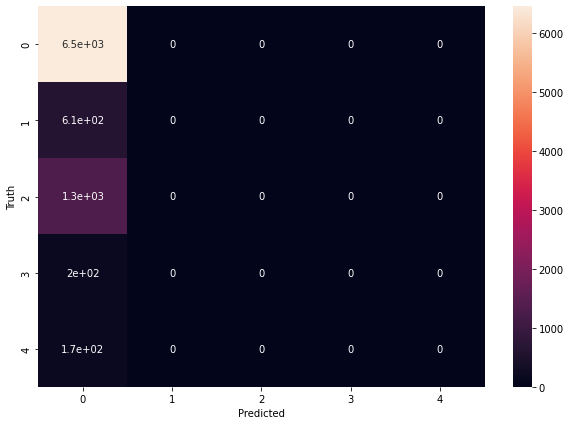

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy : ", accuracy_score(y_test,y_predicted))
print("Presicion: ", precision_score(y_test,y_predicted,average='macro'))
print("Recall   : ", recall_score(y_test,y_predicted,average='macro'))
print("F1       : ", f1_score(y_test,y_predicted,average='macro'))
# //coba macro

accuracy :  0.7356793075959458
Presicion:  0.14713586151918917
Recall   :  0.2
F1       :  0.1695426809264484


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest


In [64]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [65]:
print("accuracy : ", accuracy_score(y_test,y_pred))
print("Presicion: ", precision_score(y_test,y_pred,average='macro'))
print("Recall   : ", recall_score(y_test,y_pred,average='macro'))
print("F1       : ", f1_score(y_test,y_pred,average='macro'))

accuracy :  0.7353376608586721
Presicion:  0.21380594179773574
Recall   :  0.2001450513133526
F1       :  0.17008631517481518


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

#all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(C=100)

logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=100)

In [67]:
y_pred = logisticRegr.predict(x_test)

In [68]:
print("accuracy : ", accuracy_score(y_test,y_pred))
print("Presicion: ", precision_score(y_test,y_pred,average='macro'))
print("Recall   : ", recall_score(y_test,y_pred,average='macro'))
print("F1       : ", f1_score(y_test,y_pred,average='macro'))

accuracy :  0.7356793075959458
Presicion:  0.14713586151918917
Recall   :  0.2
F1       :  0.1695426809264484


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=13)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [57]:
print("accuracy : ", accuracy_score(y_test,y_pred))
print("Presicion: ", precision_score(y_test,y_pred,average='macro'))
print("Recall   : ", recall_score(y_test,y_pred,average='macro'))
print("F1       : ", f1_score(y_test,y_pred,average='macro'))

accuracy :  0.7329461336977565
Presicion:  0.17712275483354306
Recall   :  0.1999707576552281
F1       :  0.17094611966748913


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


import tensorflow as tf
from tensorflow import keras
model_nn = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(4, activation='sigmoid')
])

model_nn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model_nn.fit(x_train, y_train, epochs=50)